<a href="https://colab.research.google.com/github/marisaaaai/lab5/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 5.
## Análisis de Sentimientos

---
Participantes:


*   María Isabel Montoya Valladares 19169
*   Luis Pedro García Salazar 19344
* María José Morales Reichenbach 19145

### Carga de librerias




In [1]:
import pandas as pd #libreria de visualizacion de texto
import numpy as np #libreria de operaciones matematicas
import string #analisis de texto
import re #operaciones de texto
import zipfile #unzip files
import nltk #libreria para analisis
from nltk.corpus import stopwords #eliminacion de stopwrod
from wordcloud import WordCloud #graficas
import matplotlib.pyplot as plt #graficas
from nltk.sentiment.vader import SentimentIntensityAnalyzer #polaridad del texto

### Visualizacion de datos

In [2]:

file_name = 'GrammarandProductReviews.csv.zip'
with zipfile.ZipFile(file_name, 'r') as file:
    file.extractall()
datos=pd.read_csv('GrammarandProductReviews.csv')
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


Al visualizar los datos se pueden ver todos los campos de la base de datos. 
### Limpieza y Procesamiento de Datos
Para la limpieza de los datos se haran cambios de todas las letras a minusculas, se eliminaran los signos de puntuación, emojis, URLs y stopwords. Finalmente también cabe mencionar que se debe de eliminar los reviews en los que tengan valores nulos en la columna review.text

#### Eliminacion de NAN's
Se eliminan todos los datos NA para no afectar la popularidad de los reviews por reviews que no aplican y no tienen información valiosa para nuestro análisis. 

In [3]:
datos = datos.dropna(subset=['reviews.text'])


#### De Mayuscula a minuscula
Todas las palabras se vuelven minuscula para poder tener en el mismo grupo todas las palabras iguales y que se tome la popularidad de la palabra tomando en cuenta todas las veces que es mencionada. 

In [4]:
datos['reviews.text'] = datos['reviews.text'].apply(lambda line: line.lower())
datos.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor. this review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us. the gel cau...,Irritation,NaN,NaN,Walker557,67981934427


#### Eliminación de caracteres especiales
Eliminamos todos los signos de puntuación para poder evalular las palabras individualmente. Se usa la puntuación de python para revisar que borrar. 

In [5]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
datos['reviews.text'] = datos['reviews.text'].apply(remove_punctuations)
datos.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album its very good more to the hi...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor this review was collected as part ...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us the gel caus...,Irritation,NaN,NaN,Walker557,67981934427


#### Eliminacion de URLs
Eliminamos los elementos que son componentes de URLs para no tener más signos que nos interferan en el manejo de los datos durante el análisis. 

In [6]:
datos['reviews.text'] = datos['reviews.text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album its very good more to the hi...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor this review was collected as part ...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us the gel caus...,Irritation,NaN,NaN,Walker557,67981934427


#### Quitar emojis
El análisis que se realiza es para analizar las palabras que representan emociones positivas o negativas por lo que los emojis no son necesarios en este contexto y se eliminan por su código ascii. 

In [7]:
datos.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album its very good more to the hi...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor this review was collected as part ...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us the gel caus...,Irritation,NaN,NaN,Walker557,67981934427


#### Eliminacion de Stopwords
Las palabras que no representan ningún adjetivo y significado para clasificar un review como bueno o malo se eliminan por la función stopwords de Python. 

In [8]:
stop = stopwords.words('english')

datos['reviewsnostop.text'] = datos['reviews.text'].str.lower().str.split() 

datos['reviewsnostop.text'] = datos['reviewsnostop.text'].apply(lambda x: [item for item in x if item not in stop])
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,reviewsnostop.text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album its very good more to the hi...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,"[love, album, good, hip, hop, side, current, p..."
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor this review was collected as part ...,Good,NaN,NaN,Dorothy W,73416000391,"[good, flavor, review, collected, part, promot..."
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391,"[good, flavor]"
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427,"[read, reviews, looking, buying, one, couples,..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us the gel caus...,Irritation,NaN,NaN,Walker557,67981934427,"[husband, bought, gel, us, gel, caused, irrita..."


In [9]:
datos['reviews.text'] = [' '.join(map(str, l)) for l in datos['reviewsnostop.text']]

datos.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,reviewsnostop.text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,love album good hip hop side current pop sound...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,"[love, album, good, hip, hop, side, current, p..."
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor review collected part promotion,Good,NaN,NaN,Dorothy W,73416000391,"[good, flavor, review, collected, part, promot..."
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391,"[good, flavor]"
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,read reviews looking buying one couples lubric...,Disappointed,NaN,NaN,Rebecca,67981934427,"[read, reviews, looking, buying, one, couples,..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,husband bought gel us gel caused irritation fe...,Irritation,NaN,NaN,Walker557,67981934427,"[husband, bought, gel, us, gel, caused, irrita..."


### Análisis Exploratorio

#### Palabras mas frecuentes
Se buscan las palabras más usadas para poder separar por grupos los reviews de forma más fácil. Al saber que palabras son usadas generalmente en los reviews de cada uno de los ratings buscamos determinar que palabras son usadas para describir un rating bajo hasta llegar a uno alto. 

##### Palabras mas frecuentes por rating 1

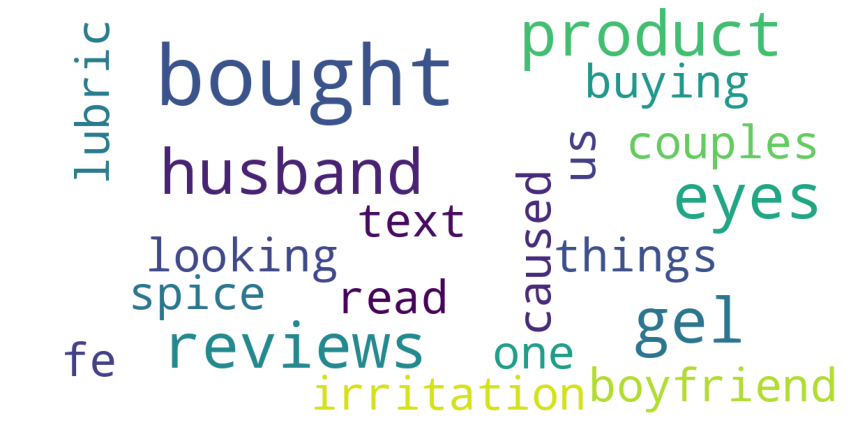

In [10]:
def most_used_words(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=20,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
r1 = datos.loc[datos['reviews.rating']==1, ['reviews.text']]
most_used_words(r1)


##### Palabras mas frecuentes por rating 2

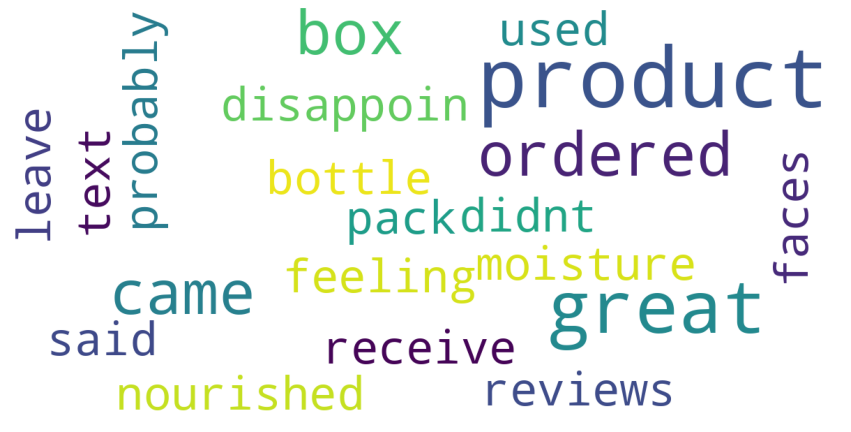

In [11]:
r2 = datos.loc[datos['reviews.rating']==2, ['reviews.text']]
most_used_words(r2)


##### Palabras mas frecuentes por rating 3

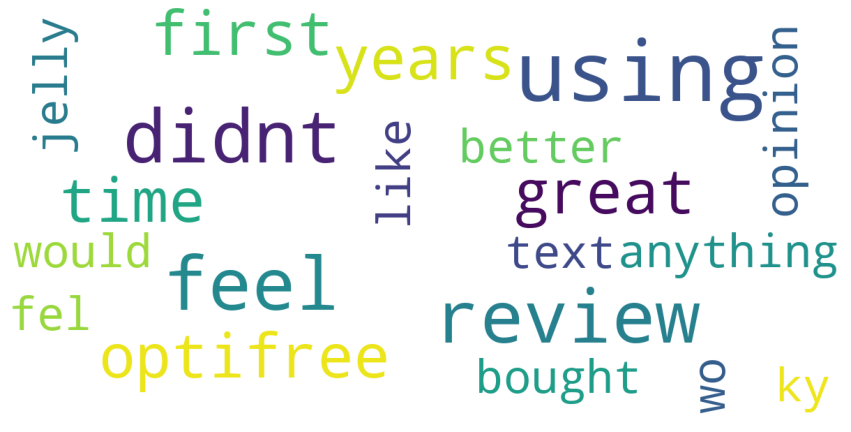

In [12]:
r3 = datos.loc[datos['reviews.rating']==3, ['reviews.text']]
most_used_words(r3)

##### Palabras mas frecuentes por rating 4

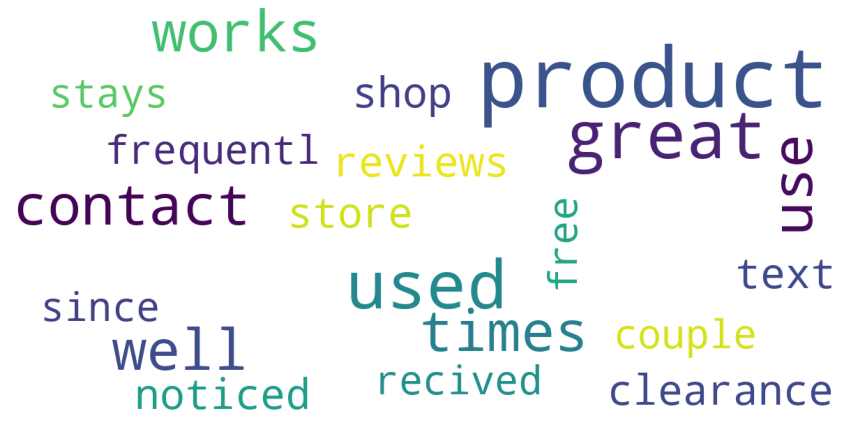

In [13]:
r4 = datos.loc[datos['reviews.rating']==4, ['reviews.text']]
most_used_words(r4)

##### Palabras mas frecuentes por rating 5

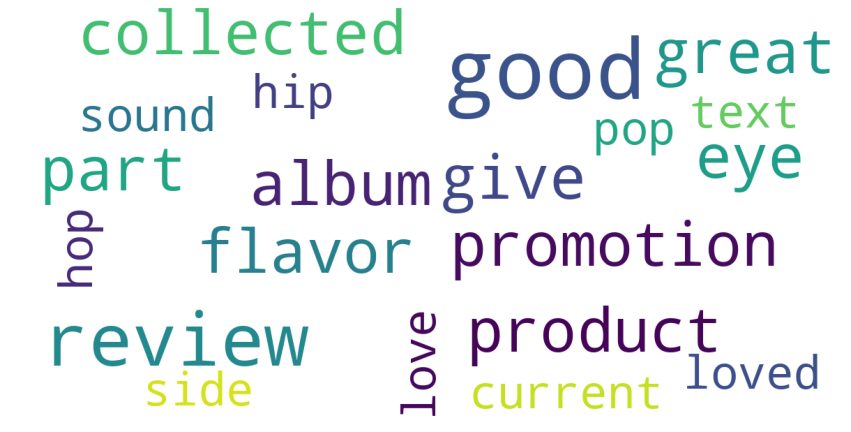

In [14]:
r5 = datos.loc[datos['reviews.rating']==5, ['reviews.text']]
most_used_words(r5)

#### Histograma de cantidad de reviews por rating

/home/marisamv/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reviews.rating', ylabel='count'>

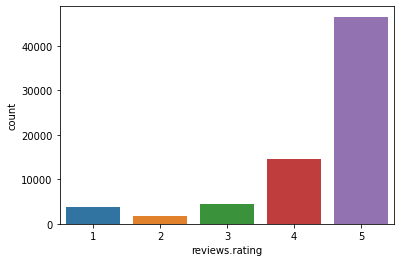

In [15]:
import seaborn as sns

sns.countplot(datos['reviews.rating'])


#### Interpretación de las palabras más frecuentes
Claramente en las reviews que tienen un rating alto, podemos encontrar palabras como good, great, love, loved... etc. Lo cual nos indica que usan estos adjetivos para describir el producto con el que están satisfechos. En los malos reviews sorprendentemente nos encontramos con palabras como husband y boyfriend (?), lo cual nos puede indicar que tal vez fueron regalos de los cuales no se fijaron en la calidad del producto, también en los ratings bajos encontramos más palabras en un sentido negativo y en tiempo pasado, en comparación con los buenos ratings. 

#### Determinación de palabras positivas o negativas
Para poder hacer esto se hara tomando en cuenta el rating que tuvieron, siendo 1 y 2 negativas, 3 neutral y 4 y 5 positivas. Luego de este análisis podremos confirmar si las nubes de palabras realizadas anteriormente nos son utiles. 

In [16]:
def classi(rating):
    if rating < 3:
        return 'Neg'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Pos'
datos['review.class'] = datos['reviews.rating'].apply(lambda rate: classi(rate))
pos = {} #dic con counters
neg = {}
    
for review, classif in zip(datos['reviews.text'], datos['review.class']):
    text = review.split(' ')
    for word in text:
        if word not in stop and word != '':
            if classif == 'Pos':
                counter = pos.get(word)
                if counter:
                    pos[word] = counter + 1
                else:
                    pos[word] = 1
            elif classif == 'Neg':
                counter = neg.get(word)
                if counter:
                    neg[word] = counter + 1
                else:
                    neg[word] = 1


##### Positivas

In [17]:
pos

{'love': 15936,
 'album': 190,
 'good': 10152,
 'hip': 7,
 'hop': 4,
 'side': 329,
 'current': 71,
 'pop': 277,
 'sound': 638,
 'hype': 30,
 'listen': 95,
 'everyday': 697,
 'gym': 77,
 'give': 935,
 '5star': 10,
 'rating': 78,
 'way': 2540,
 'metaphors': 1,
 'crazy': 193,
 'flavor': 325,
 'review': 17133,
 'collected': 16243,
 'part': 16965,
 'promotion': 16247,
 'noticed': 1180,
 'product': 15977,
 'clearance': 10,
 'store': 875,
 'shop': 66,
 'frequently': 80,
 'decided': 382,
 'try': 2254,
 'husband': 757,
 'went': 739,
 'back': 1957,
 'bought': 2392,
 'every': 2407,
 'box': 435,
 'left': 1200,
 'like': 8612,
 'others': 616,
 'mentioned': 50,
 'sure': 1183,
 'supposed': 103,
 'lubricant': 3,
 'purpose': 88,
 'much': 4163,
 'better': 3081,
 'regular': 586,
 'ky': 1,
 'jelly': 10,
 'tends': 78,
 'dry': 2958,
 'disappear': 60,
 'us': 541,
 'stays': 287,
 'awhile': 100,
 'makes': 2627,
 'pleasurable': 3,
 'experience': 308,
 'drawback': 49,
 'find': 1719,
 'bit': 1258,
 'sticky': 352,


##### Negativas

In [18]:
neg

{'read': 108,
 'reviews': 234,
 'looking': 235,
 'buying': 196,
 'one': 1575,
 'couples': 1,
 'lubricants': 1,
 'ultimately': 7,
 'disappointed': 656,
 'didnt': 606,
 'even': 569,
 'live': 54,
 'starters': 3,
 'neither': 17,
 'boyfriend': 5,
 'could': 456,
 'notice': 118,
 'sort': 22,
 'enhanced': 5,
 'captivating': 2,
 'sensation': 14,
 'however': 340,
 'messy': 16,
 'consistency': 53,
 'reminiscent': 1,
 'liquidy': 4,
 'vaseline': 10,
 'difficult': 55,
 'clean': 286,
 'pleasant': 45,
 'especially': 64,
 'since': 326,
 'lacked': 3,
 'expecting': 43,
 'im': 707,
 'paid': 27,
 'much': 521,
 'lube': 3,
 'wont': 241,
 'use': 1404,
 'normal': 69,
 'personal': 8,
 'lubricant': 3,
 '1': 181,
 'less': 154,
 'money': 403,
 '2': 401,
 'mess': 119,
 'husband': 111,
 'bought': 916,
 'gel': 798,
 'us': 69,
 'caused': 56,
 'irritation': 13,
 'felt': 194,
 'like': 1489,
 'burning': 25,
 'skin': 808,
 'wouldnt': 122,
 'recommend': 298,
 'spice': 3,
 'things': 76,
 'bedroom': 5,
 'highly': 38,
 'produ

### Teniendo en cuenta la cantidad de palabras positivas y negativas del review determine quétan positivo, negativo o neutral es el mismo para el producto.

In [19]:
# add sentiment anaylsis columns
sid = SentimentIntensityAnalyzer()
datos['reviewsPol.text'] = datos['reviews.text'].apply(lambda x: sid.polarity_scores(x))
datos = pd.concat([datos.drop(['reviewsPol.text'], axis=1), datos['reviewsPol.text'].apply(pd.Series)], axis=1)
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.userCity,reviews.userProvince,reviews.username,upc,reviewsnostop.text,review.class,neg,neu,pos,compound
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,Los Angeles,NaN,Joshua,6.02537E+11,"[love, album, good, hip, hop, side, current, p...",Pos,0.094,0.627,0.278,0.6908
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,NaN,Dorothy W,73416000391,"[good, flavor, review, collected, part, promot...",Pos,0.000,0.633,0.367,0.4404
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,NaN,Dorothy W,73416000391,"[good, flavor]",Pos,0.000,0.256,0.744,0.4404
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,NaN,Rebecca,67981934427,"[read, reviews, looking, buying, one, couples,...",Neg,0.196,0.715,0.089,-0.7305
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,NaN,Walker557,67981934427,"[husband, bought, gel, us, gel, caused, irrita...",Neg,0.286,0.582,0.132,-0.4423


Lo que se hizo anteriormente fue usa el analisis de sentimiento para obtener la polaridad del texto y su coeficiente de positivo, negativo y neutral. Para asi obtener un valor compuesto que se encuentre entre -1 y 1. Si es un numero <0 es porque es un review negativo y si es >0 es porque es positivo. Este valor compuesto se encuentra en la columna llamada 'compound', para clasificar los reviews segun este valor se hara una funcion y guardar bajo la columna 'review.classification'.

In [20]:
def classification(rating):
    if rating < 0:
        return 'Neg'
    elif rating == 0:
        return 'Neutral'
    else:
        return 'Pos'
datos['review.classification'] = datos['compound'].apply(lambda rate: classification(rate))
datos[['reviews.text', 'review.class', 'review.classification']].head()


,reviews.text,review.class,review.classification
0,love album good hip hop side current pop sound...,Pos,Pos
1,good flavor review collected part promotion,Pos,Pos
2,good flavor,Pos,Pos
3,read reviews looking buying one couples lubric...,Neg,Neg
4,husband bought gel us gel caused irritation fe...,Neg,Neg


Como podemos ver compound nos ayudo a conocer, mediante el analisis de texto si el review era positivo o negativo, lo cual concuerda con la categorias dadas por review.class que fue por el rating (de 1 a 5) que se le dio al producto. 

### Determinación de diferentes productos y/o clientes
#### Cuáles son los 10 productos de mejor calidad dado su review
Esto se hace a traves de su valor de pos segun el analisis de sentimientos, ya que se sabe que entre más cercano a 1, mejor fue la calidad del review en la columna de pos

In [25]:
hola = datos.sort_values(by='pos', ascending = False)[['name','brand','reviews.text', 'review.class', 'review.classification','pos']].head(10)

hola['name'].value_counts()[:15].sort_values(ascending=False) 

Maybelline Eye Studio Color Plush Shadow Quad, Gutsy Green    4
Cinnamon Toast Crunch                                         3
Nutrigrain Cereal Bars, Mixed Berry, 8 Ct.                    2
Meguiar's Ultimate Quik Detailer 22-Oz.                       1
Name: name, dtype: int64

#### Cuáles son los 10 productos de menor calidad dado su review
Esto se hace a traves de su valor de neg segun el analisis de sentimientos, ya que se sabe que entre más cercano a 1, peor fue la calidad del review en la columna de neg

In [26]:
bro = datos.sort_values(by='neg', ascending = False)[['name','brand','reviews.text', 'review.classification','neg']].head(10)
bro['name'].value_counts()[:15].sort_values(ascending=False) 

Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                              2
Lysol Concentrate Deodorizing Cleaner, Original Scent                                 1
Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz    1
Hawaiian Punch Orange Ocean Juice                                                     1
Sanford Glass Beverage Dispenser - Clear                                              1
Red (special Edition) (dvdvideo)                                                      1
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                  1
Nature's Path Flax Plus Maple Pecan Crunch Cereal                                     1
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                    1
Name: name, dtype: int64

**Cuáles son los usuarios que dan la mayor cantidad de reviews a distintos productos.**

In [24]:
datos['reviews.username'].value_counts()[:15].sort_values(ascending=False) 

An anonymous customer    421
Anonymous                113
Mike                     105
Chris                     88
ByAmazon Customer         58
Dave                      57
John                      49
Rick                      41
James                     32
Robert                    31
Sandy                     30
Lisa                      29
Tony                      29
Steve                     28
Rich                      24
Name: reviews.username, dtype: int64

Tenemos un listado de los 15 usuarios con mas reviews a productos diferentes. Como los usuarios no son únicos, entre los más frecuentes se encuentran usuarios con nombres comunes en los EEUU., o anónimos

**Cuáles son los usuarios que más reviews negativos y positivos dan en promedio.**
Se seleccionan los datos en donde la clasificación fue positiva y se ordenan de forma ascendente para seleccionar a los usuarios que dan mejores reviews. Luego se repitió el proceso con los reviews negativos para saber que usuarios dan los peores reviews. 

In [25]:
#Positivos
pos =  datos[datos['review.classification'] == 'Pos'  ]
pos['reviews.username'].value_counts()[:15].sort_values(ascending=False) 

An anonymous customer    368
Mike                     100
Anonymous                 91
Chris                     81
Dave                      54
John                      44
ByAmazon Customer         41
Rick                      34
James                     29
Robert                    28
Sandy                     26
Tony                      25
Steve                     24
Lisa                      23
Donna                     22
Name: reviews.username, dtype: int64

In [26]:
#Negativos

neg =  datos[datos['review.classification'] == 'Neg' ]
neg['reviews.username'].value_counts()[:15].sort_values(ascending=False) 

An anonymous customer    34
ByAmazon Customer        16
Anonymous                 7
Mike                      4
Lisa                      4
Chris                     4
Rick                      4
Cool                      4
Nancy                     3
Vicky                     3
TimmyG84                  3
Disappointed              3
Bobcat                    3
Phil                      3
Lind                      3
Name: reviews.username, dtype: int64

**Cuáles son los productores que tienen productos de mejor calidad.**
Se seleccionan los productos que no tienen reviews negativos y se ordenan segun su marca haciendo un conteo para tener las marcas mas populares. 

In [27]:
mCalidad = datos[datos['neg'] == 0 ]
mCalidad['brand'].value_counts()[:15].sort_values(ascending=False) 

Clorox                  8254
Universal Home Video    5507
FOX                     3251
Disney                  3137
Tide                    2960
Warner Home Video       2407
Olay                    1742
Warner Bros.            1605
L'Oreal Paris           1567
Sony Pictures           1408
L'oreal Paris           1386
Quilted Northern        1166
Lionsgate               1043
Summit Entertainment     664
Burt's Bees              550
Name: brand, dtype: int64

**Cuáles son los productores que tienen productos de peor calidad.**
Se repite el proceso para tener a las marcas menos populares seleccionando los datos que tienen calificación negativa arriba de 0.5.

In [28]:
pCalidad = datos[datos['neg'] > 0.5 ]
pCalidad['brand'].value_counts()[:15].sort_values(ascending=False) 

FOX                           26
Sony Pictures                 18
Warner Home Video             17
Nexxus                         8
Rubbermaid                     8
Universal Home Video           8
Aveeno                         7
Maybelline                     6
Tostitos                       4
Warner Bros.                   4
Clorox                         4
Clear Scalp & Hair Therapy     3
Quilted Northern               3
Opti-Free                      2
Disney                         2
Name: brand, dtype: int64

Filtrando las reviews, donde el valor de sentimiento negativo es mayor a 0.5 (donde el máximo es 1.0)

**Imagine que usted es analista de negocios y que está realizando este análisis para el productor que tiene más productos con malos reviews ¿Qué le propondría a esta empresa para** **mejorar sus productos? Puede basar su análisis en la frecuencia de las palabras de las opiniones.**
La empresa menos popular según nuestro análisis es FOX. Se realiza un análisis de las palabras que generalmente son usadas en los malos reviews de FOX para saber en que están fallando. 

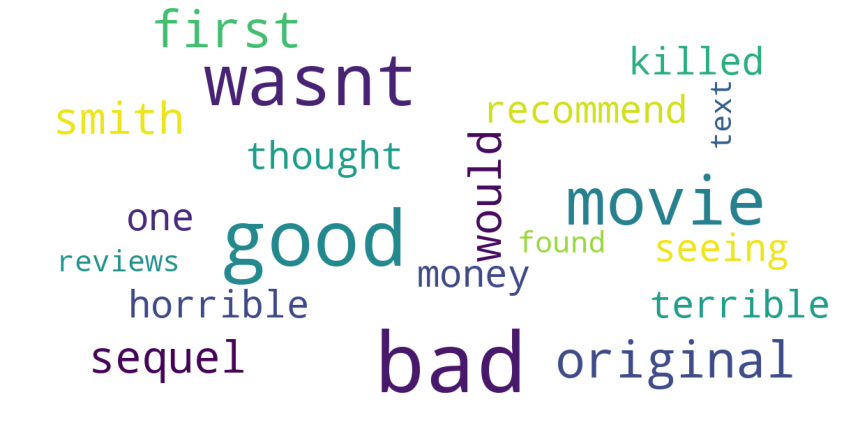

In [32]:
datosFOX = datos[datos['brand']=='FOX']
x = datosFOX.loc[datosFOX['neg']>0.5, ['reviews.text']]
most_used_words(x) 
#r1 = datos.loc[datos['reviews.rating']==1, ['reviews.text']]
#most_used_words(r1)

La empresa menos popular según nuestro análisis es FOX. Se realiza un análisis de las palabras que generalmente son usadas en los malos reviews de FOX para saber en que están fallando. Basado en las palabras mas populares podemos ver que los reviews malos suelen mencionar secuela, malo, terrible y original. A partir de eso podemos inferir que los clientes no están satisfechos con las secuelas de las películas y que no las recomendarían. Nuestro consejo es revisar que tramas de las películas están siendo mas populares para enfocarse en continuar en esta linea para la secuela. También hacer encuentas a una porción de la población considerable si desean que hagan secuelas, asimismo no perder la integridad de las películas originales. 